<a href="https://colab.research.google.com/github/Abcdefghijkirah/Test-/blob/main/Yolov8_object_detection_on_custom_dataset_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Jan 10 13:06:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **18.01.2023** with version **YOLOv8.0.9**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [2]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

/content
100% 6.23M/6.23M [00:00<00:00, 21.6MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 5.08MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 15.8ms
Speed: 0.6ms pre-process, 15.8ms inference, 48.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# %cd {HOME}
# Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72712, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Custom Training

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/Obstacles_detection

/content/drive/MyDrive/Obstacles_detection


In [7]:
%cd /content/drive/MyDrive/Obstacles_detection

!yolo task=detect mode=train model=yolov8n.pt data= data.yaml epochs=100 imgsz=640 plots=True

/content/drive/MyDrive/Obstacles_detection
Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

In [8]:
!ls runs/detect/train2/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1704892209.4ec761ad1df5.1939.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch18090.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch18091.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch18092.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


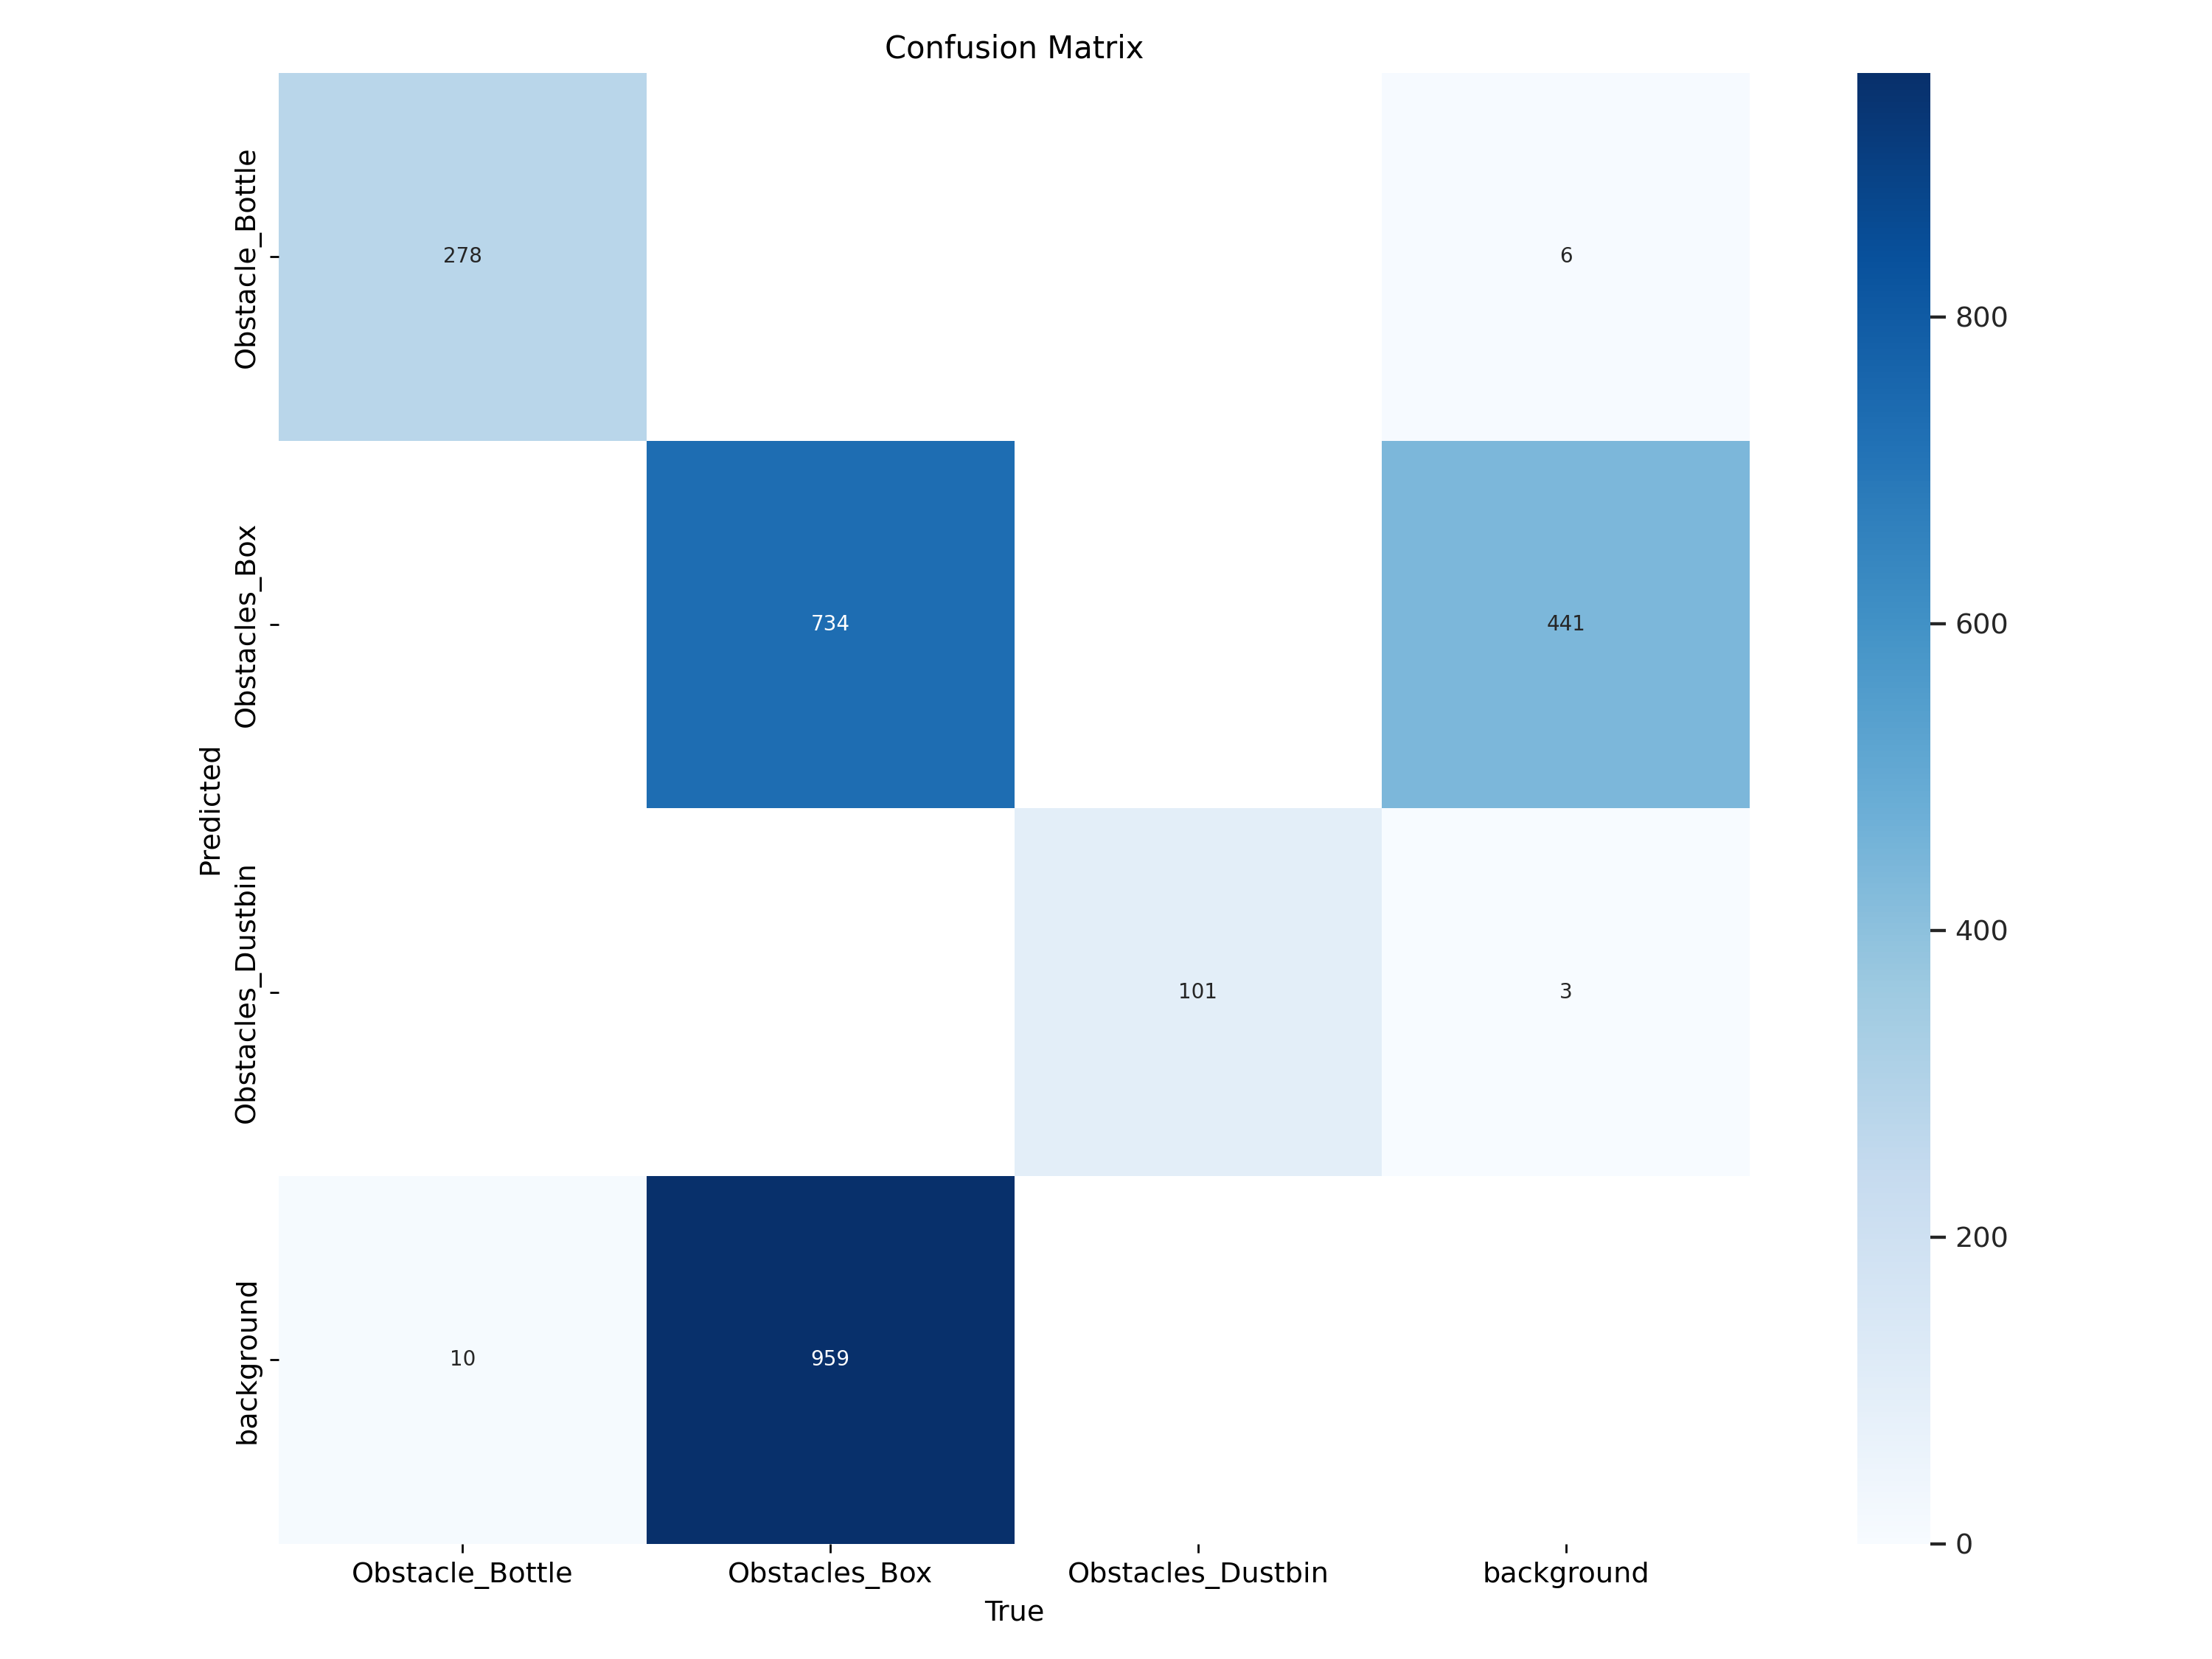

In [9]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

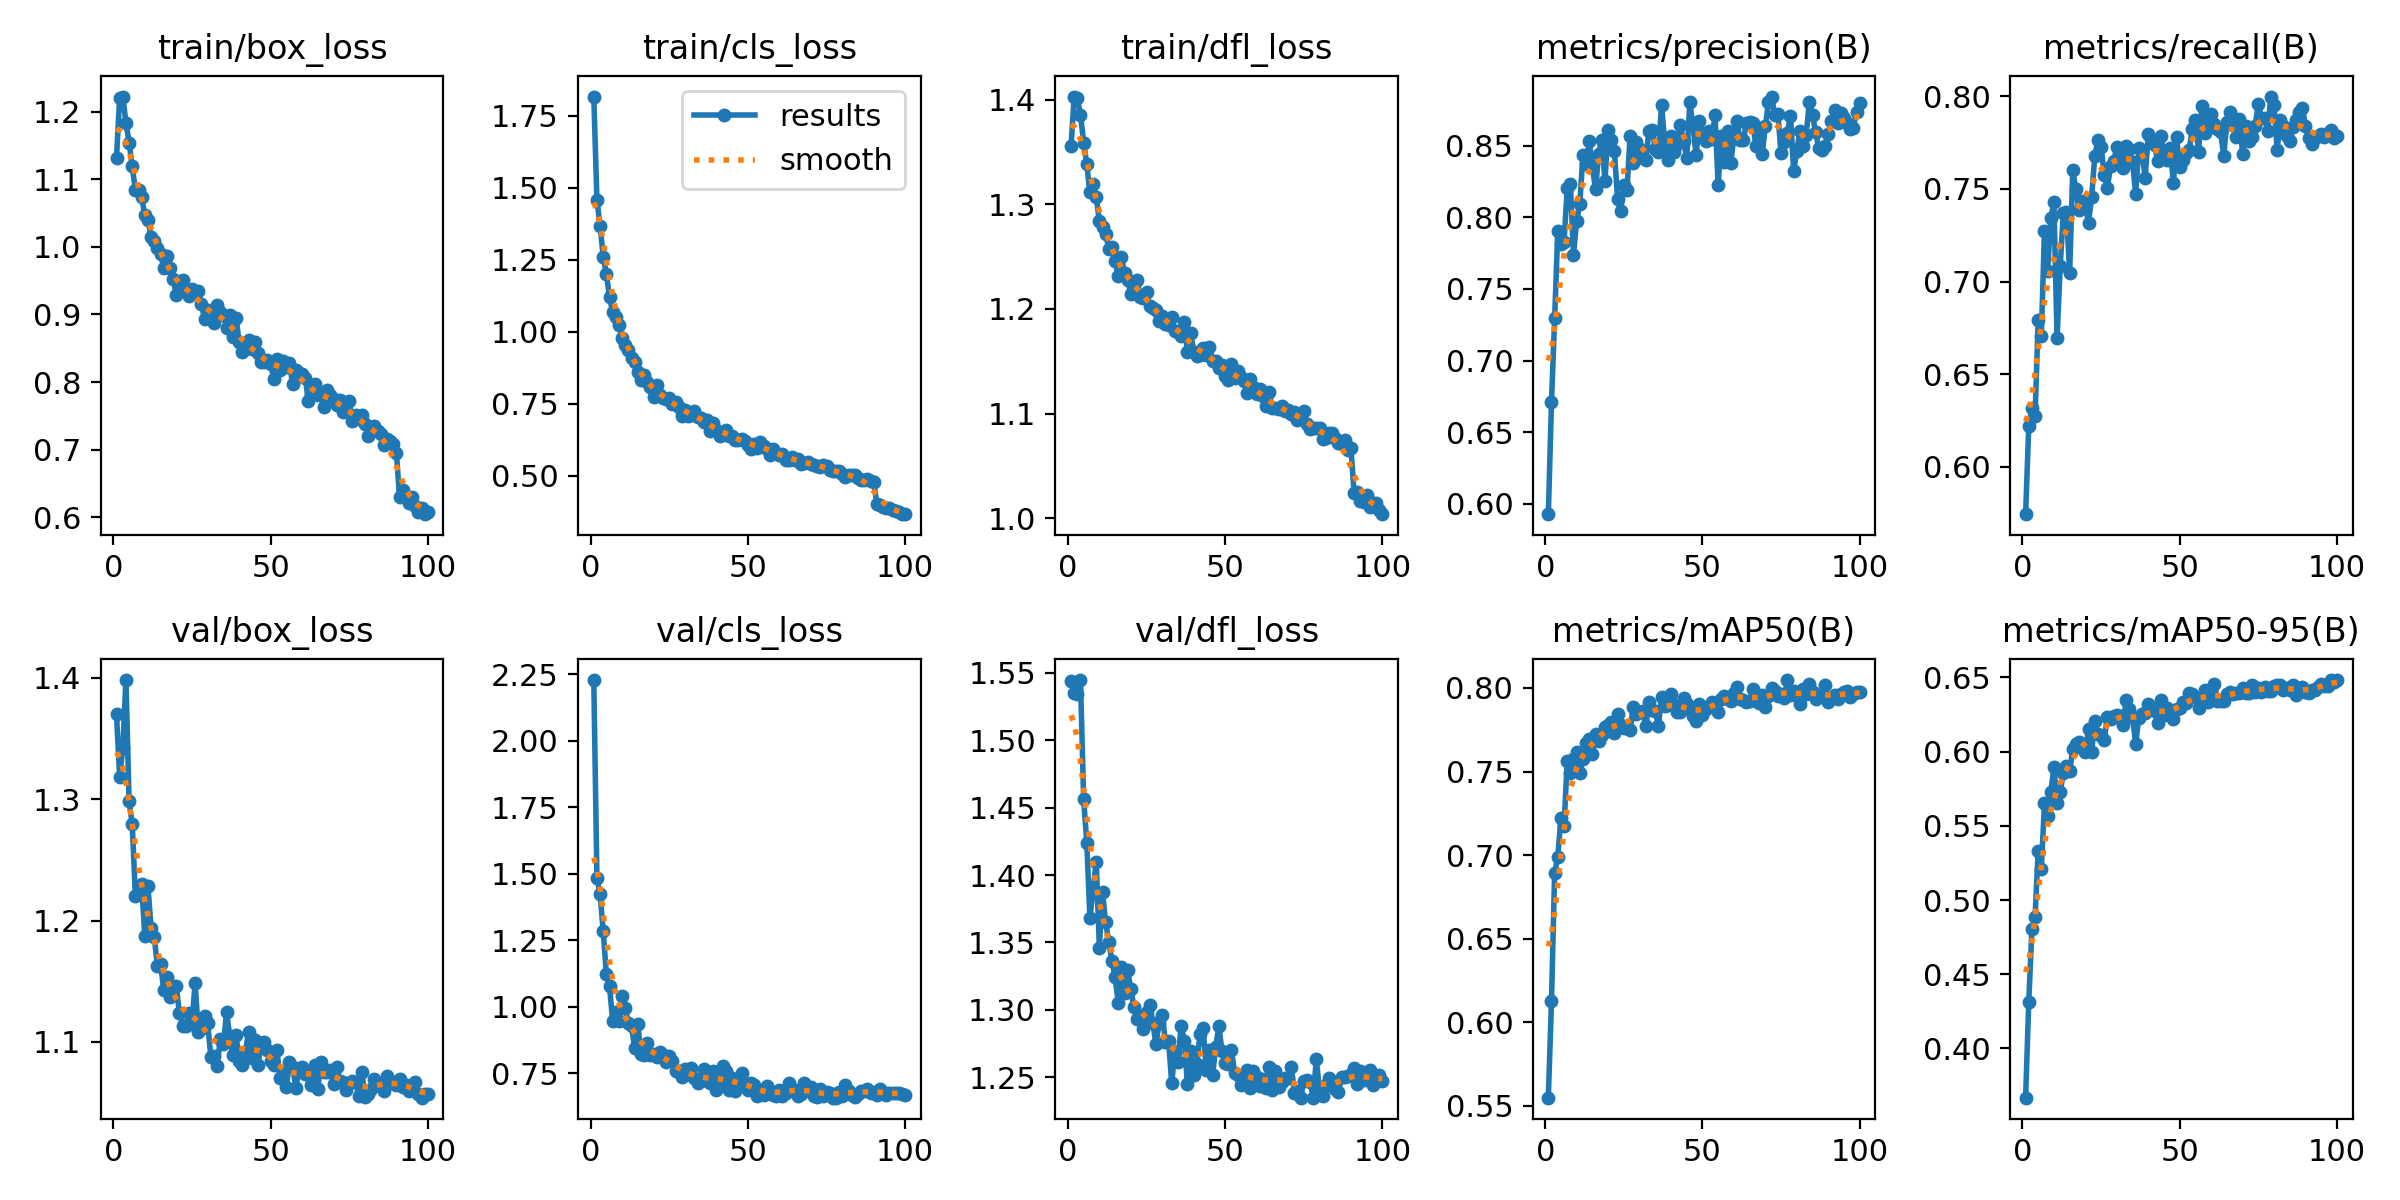

In [10]:
Image(filename='runs/detect/train2/results.png', width=600)

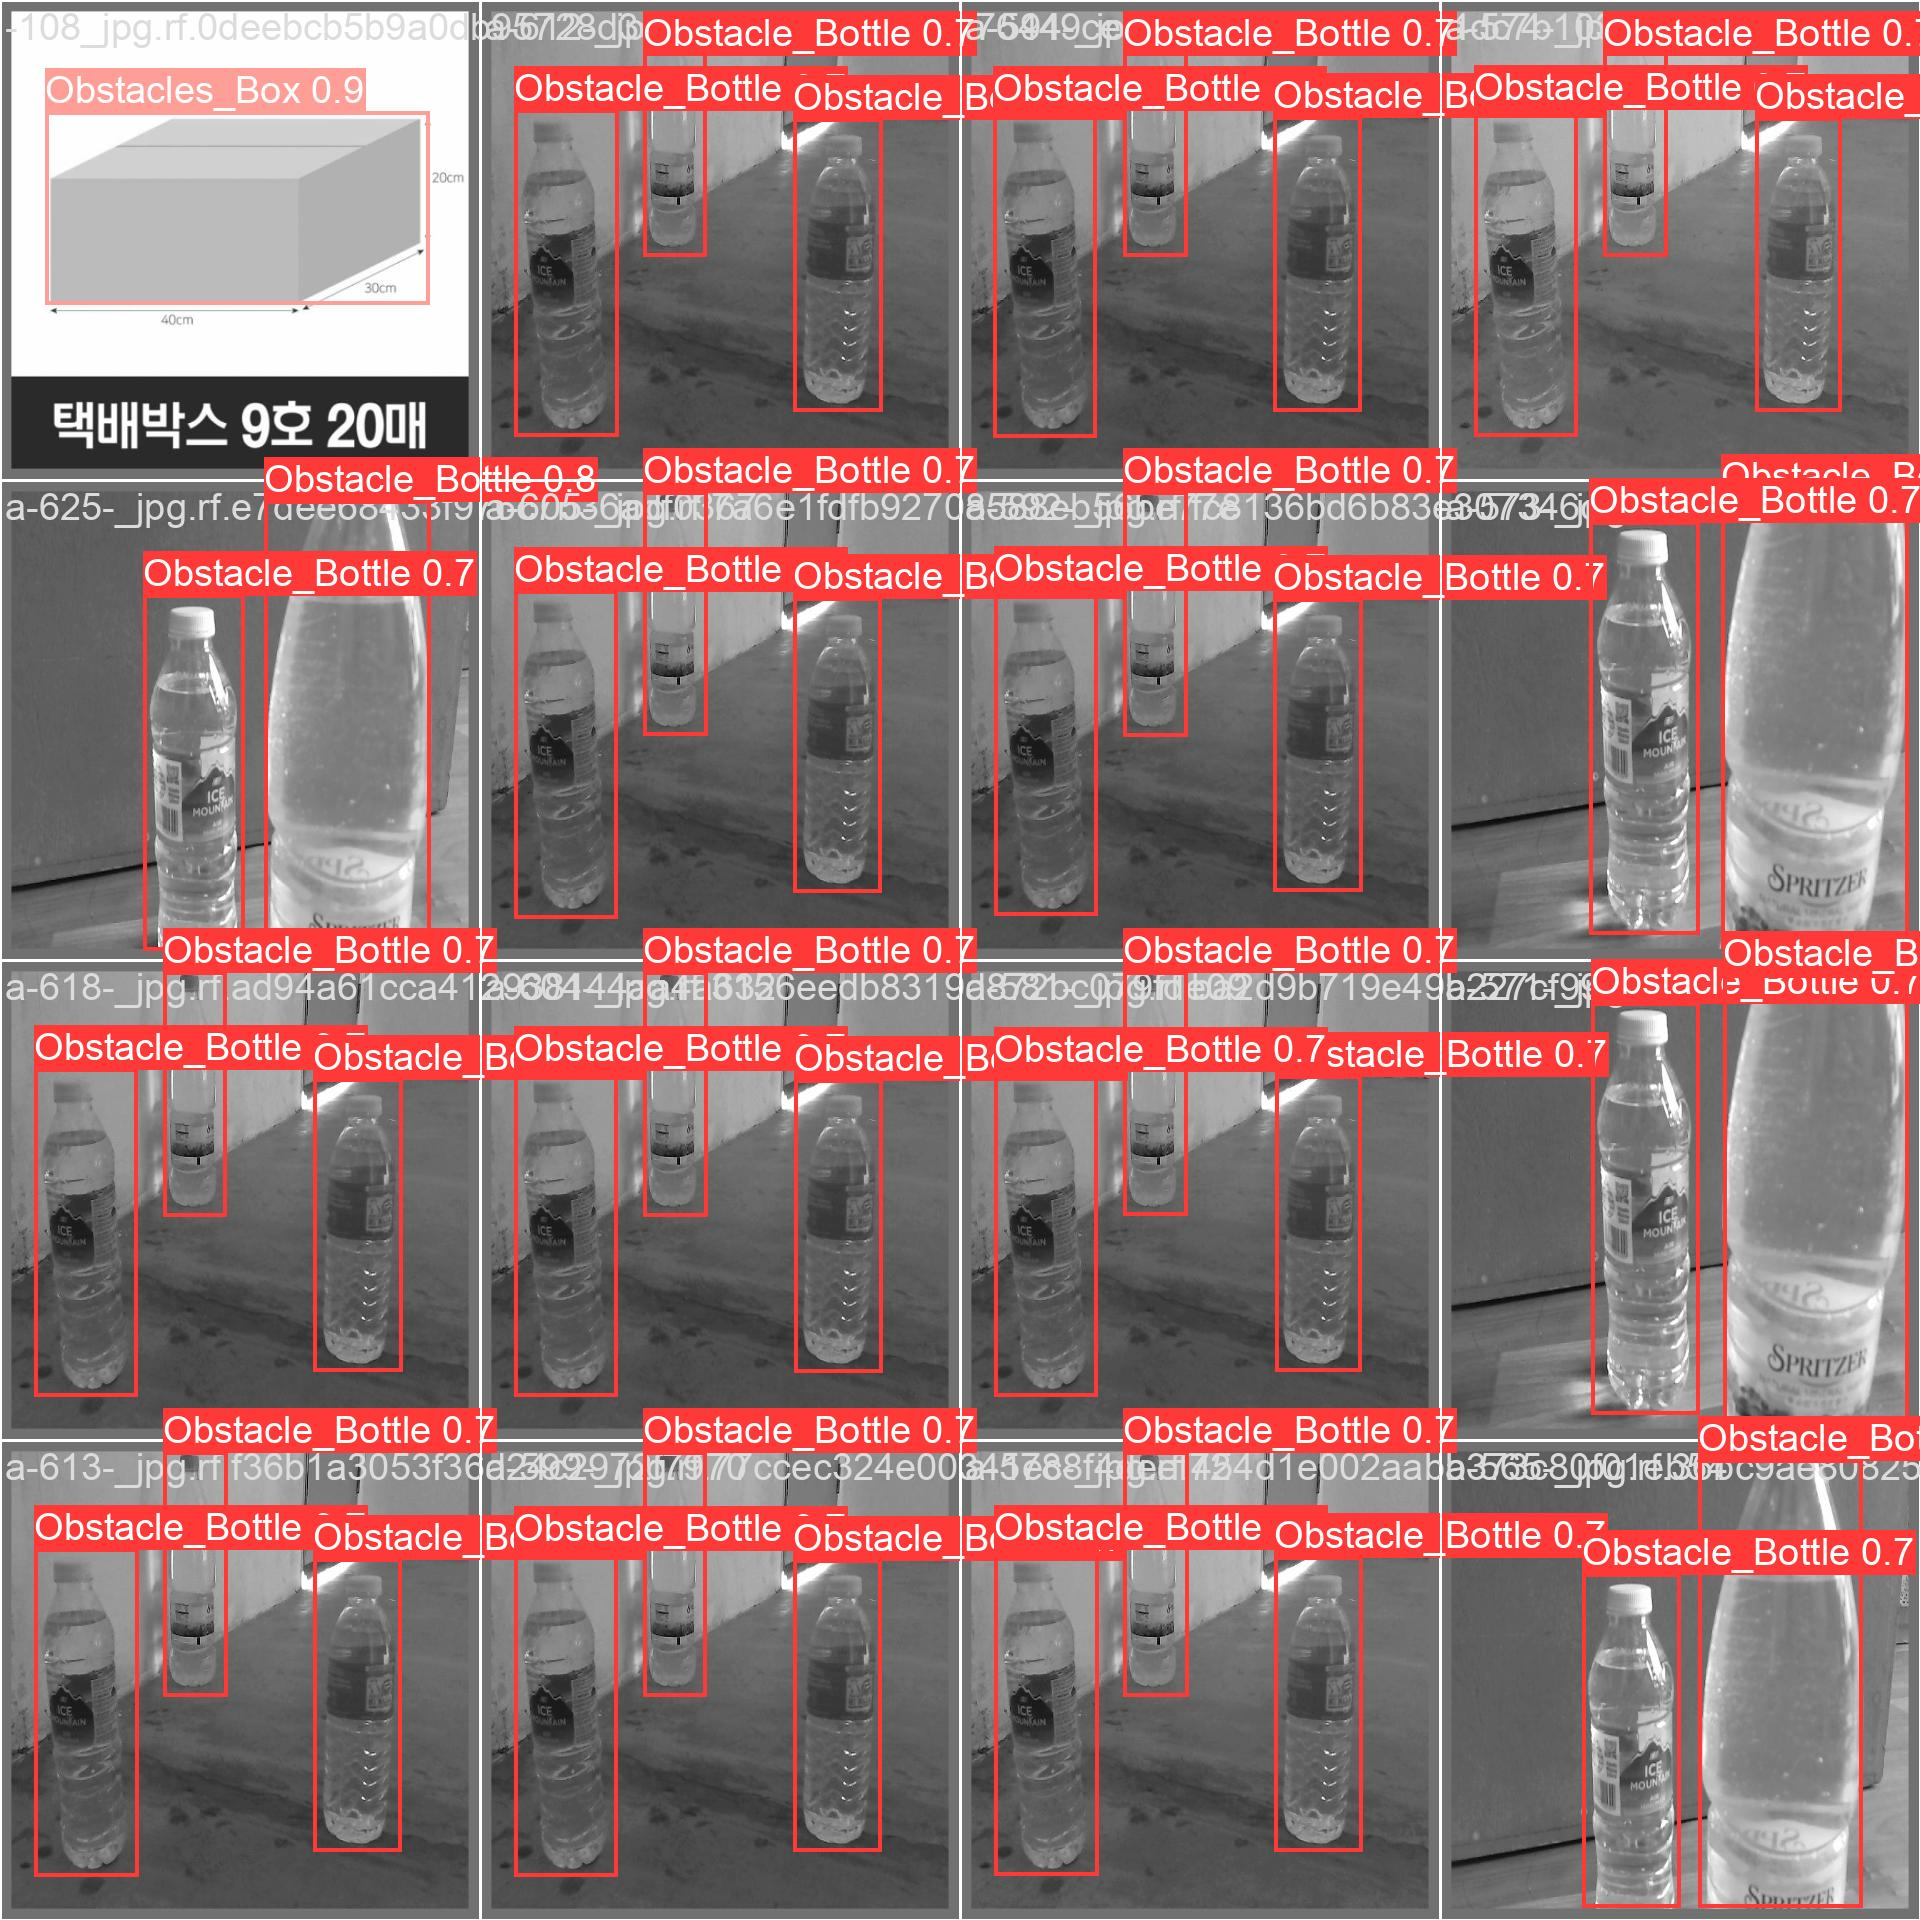

In [11]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Obstacles_detection/valid/labels.cache... 312 images, 5 backgrounds, 0 corrupt: 100% 312/312 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 619, len(boxes) = 2082. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:07<00:00,  2.55it/s]
                   all        312       2082      0.879      0.779      0.798      0.648
       Obstacle_Bottle        312        288      0.961      0.958      0.978      0.732
         Obstacles_Box        312       1693      0.686      0.392      0.421      0.249
     Obstacles_Dustbin

## Inference with Custom Model

In [15]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Obstacles_detection/test/images

Ultralytics YOLOv8.1.0 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs

image 1/133 /content/drive/MyDrive/Obstacles_detection/test/images/-137_jpg.rf.25a958927cedd81fb136c2559e66f948.jpg: 640x640 3 Obstacles_Boxs, 11.1ms
image 2/133 /content/drive/MyDrive/Obstacles_detection/test/images/-13_jpg.rf.126a9e7eb5ac86b62a803c407e680344.jpg: 640x640 1 Obstacles_Box, 9.6ms
image 3/133 /content/drive/MyDrive/Obstacles_detection/test/images/-35_jpg.rf.8c8bd12021c7f017e8d7259443012ef9.jpg: 640x640 1 Obstacle_Bottle, 1 Obstacles_Box, 7.3ms
image 4/133 /content/drive/MyDrive/Obstacles_detection/test/images/-3_jpg.rf.6bf955d8942dfdffeaf3efde8cf32780.jpg: 640x640 1 Obstacles_Box, 9.3ms
image 5/133 /content/drive/MyDrive/Obstacles_detection/test/images/-44_jpg.rf.3c425e91c65bebcc90100a2d614ce4fb.jpg: 640x640 6 Obstacles_Boxs, 11.1ms
image 6/133 /content/drive/MyDrive/Obstacles_detection/test/images/-65_jpg.r

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")